## Môi trường lập trình

In [1]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
import string
string.punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
nltk.download("punkt")

from nltk.classify import MaxentClassifier
from nltk.tokenize import word_tokenize

import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo

# Đọc dữ liệu

In [4]:
data_train  = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Natural_Language_Processing/Data_NLP/training.csv')
data_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Natural_Language_Processing/Data_NLP/test.csv')
data_validation = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Natural_Language_Processing/Data_NLP/validation.csv')

# Tiền xử lý dữ liệu

In [5]:
print('Dataset information:')
print(f'Training data: {data_train.shape}')
print(f'Validation data: {data_validation.shape}')
print(f'Test data: {data_test.shape}')

Dataset information:
Training data: (16000, 2)
Validation data: (2000, 2)
Test data: (2000, 2)


In [6]:
df = pd.concat([data_train, data_test], axis = 0)

In [7]:
missing_value = df.isnull().sum()
missing_value

text     0
label    0
dtype: int64

In [8]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
df['emotion'] = df['label'].map(labels_dict )
df.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


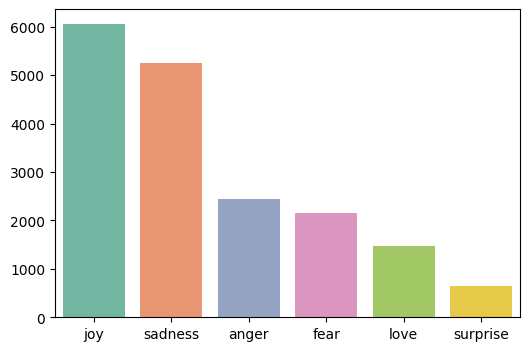

In [49]:
plt.figure(figsize=(6, 4))
sns.barplot(x=df['emotion'].value_counts().index,  y=df['label'].value_counts().values, palette='Set2')

# displaying chart
plt.show()

In [11]:
df

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
1995,i just keep feeling like someone is being unki...,3,anger
1996,im feeling a little cranky negative after this...,3,anger
1997,i feel that i am useful to my people and that ...,1,joy
1998,im feeling more comfortable with derby i feel ...,1,joy


In [12]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

In [13]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

In [14]:
df['text'] = df['text'].apply(lambda x:remove_punctuation(x))
df['text'] = df['text'].apply(lambda x: tokenization(x))
df['text'] = df['text'].apply(lambda x:remove_stopwords(x))
df['text'] = df['text'].apply(lambda x:lemmatizer(x))

In [15]:
df['text'] = [item[0] for item in df['text']]

In [16]:
df

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
1995,i just keep feeling like someone is being unki...,3,anger
1996,im feeling a little cranky negative after this...,3,anger
1997,i feel that i am useful to my people and that ...,1,joy
1998,im feeling more comfortable with derby i feel ...,1,joy


In [17]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

#DATA VECTORIZATION AND CLEANUP

In [18]:
vect = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

In [19]:
X = df['text']
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

#Decision Tree

In [21]:
X_ml = vect.fit_transform(X)


In [22]:
X_train_ml, X_test_ml, y_train, y_test = train_test_split(X_ml,y, test_size=0.2, random_state=123)

In [23]:
classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

classifier.fit(X_train_ml, y_train)

y_pred_adaboost = classifier.predict(X_test_ml)
accuracy_Ada = accuracy_score(y_test, y_pred_adaboost)

print(f"Accuracy: {accuracy_Ada*100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))

Accuracy: 83.75%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1060
           1       0.86      0.84      0.85      1225
           2       0.75      0.72      0.74       300
           3       0.79      0.88      0.83       459
           4       0.86      0.82      0.84       443
           5       0.64      0.79      0.71       113

    accuracy                           0.84      3600
   macro avg       0.80      0.82      0.81      3600
weighted avg       0.84      0.84      0.84      3600



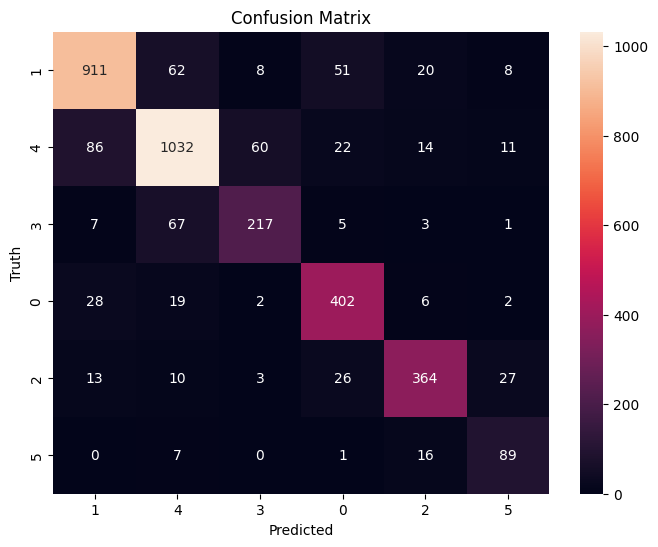

In [24]:
cm_ml = confusion_matrix(y_test, y_pred_adaboost)
labels = y_test.unique()

plt.figure(figsize=(8,6))
sns.heatmap(cm_ml, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

#MaxEnt

In [25]:
# Hàm trích xuất đặc trưng từ văn bản
def extract_features(text):
    words = word_tokenize(text)
    return dict([(word, True) for word in words])



In [26]:
train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))

# Trích xuất đặc trưng và tạo dữ liệu đầu vào cho MaxEnt
train_features = [(extract_features(text), label) for text, label in train_data]
test_features = [(extract_features(text), label) for text, label in test_data]



In [27]:
# Xây dựng và huấn luyện mô hình MaxEnt
maxent_classifier = MaxentClassifier.train(train_features,trace=0,
                                           algorithm='iis', max_iter = 20, min_lldelta=0.001)


In [28]:
# Đánh giá mô hình trên tập kiểm tra
predictions = [maxent_classifier.classify(extract_features(text)) for text, _ in test_data]

# Đánh giá mô hình
accuracy_maxent = accuracy_score([label for _, label in test_data], predictions)
print(f"Accuracy: {accuracy_maxent*100:.2f}%")
print("Classification Report:\n", classification_report([label for _, label in test_data], predictions))

Accuracy: 74.61%
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      1060
           1       0.72      0.91      0.81      1225
           2       0.66      0.28      0.39       300
           3       0.77      0.56      0.65       459
           4       0.79      0.61      0.69       443
           5       0.76      0.22      0.34       113

    accuracy                           0.75      3600
   macro avg       0.74      0.58      0.62      3600
weighted avg       0.75      0.75      0.73      3600



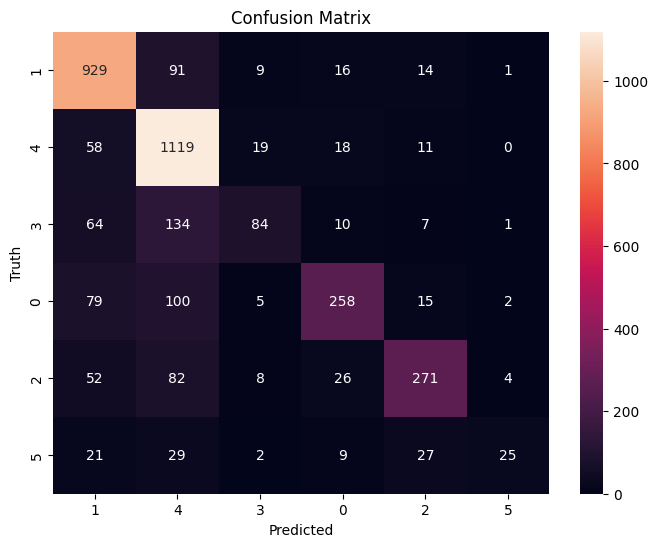

In [29]:
cm_maxent = confusion_matrix([label for _, label in test_data], predictions)
labels = y_test.unique()

plt.figure(figsize=(8,6))
sns.heatmap(cm_maxent, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

#Deep Learning


LSTM models


In [30]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

In [31]:
# Chuyển văn bản thành chuỗi
train_sequences = tokenizer.texts_to_sequences(df['text'])

val_sequences = tokenizer.texts_to_sequences(data_validation['text'])

# Đệm các chuỗi để đảm bảo rằng tất cả các chuỗi có cùng độ dài
max_sequence_length = max(len(seq) for seq in train_sequences)

train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)

val_sequences = pad_sequences(val_sequences, maxlen=max_sequence_length)

In [32]:
# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=128, input_length = max_sequence_length))

model.add(LSTM(128))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Train the model
history = model.fit(train_sequences, df['label'], epochs=10, batch_size=32,
                    validation_data=(val_sequences, data_validation['label']))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_sequences, data_validation['label'], verbose=0)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')

# Predict probabilities for each class on the validation set
val_probabilities = model.predict(val_sequences)

# Get predicted classes based on the highest probability
val_predictions = val_probabilities.argmax(axis=-1)

# Print classification report
class_report = classification_report(data_validation['label'], val_predictions)
print("Classification Report:\n", class_report)

Epoch 1/10
563/563 [==============================] - 21s 33ms/step - loss: 0.9142 - accuracy: 0.6618 - val_loss: 0.3276 - val_accuracy: 0.8925
Epoch 2/10
563/563 [==============================] - 7s 13ms/step - loss: 0.1971 - accuracy: 0.9302 - val_loss: 0.1959 - val_accuracy: 0.9250
Epoch 3/10
563/563 [==============================] - 5s 8ms/step - loss: 0.0967 - accuracy: 0.9624 - val_loss: 0.1734 - val_accuracy: 0.9270
Epoch 4/10
563/563 [==============================] - 5s 8ms/step - loss: 0.0622 - accuracy: 0.9769 - val_loss: 0.1724 - val_accuracy: 0.9320
Epoch 5/10
563/563 [==============================] - 6s 10ms/step - loss: 0.0472 - accuracy: 0.9828 - val_loss: 0.1950 - val_accuracy: 0.9295
Epoch 6/10
563/563 [==============================] - 4s 8ms/step - loss: 0.0364 - accuracy: 0.9862 - val_loss: 0.2249 - val_accuracy: 0.9225
Epoch 7/10
563/563 [==============================] - 4s 8ms/step - loss: 0.0335 - accuracy: 0.9872 - val_loss: 0.2278 - val_accuracy: 0.9215
Ep

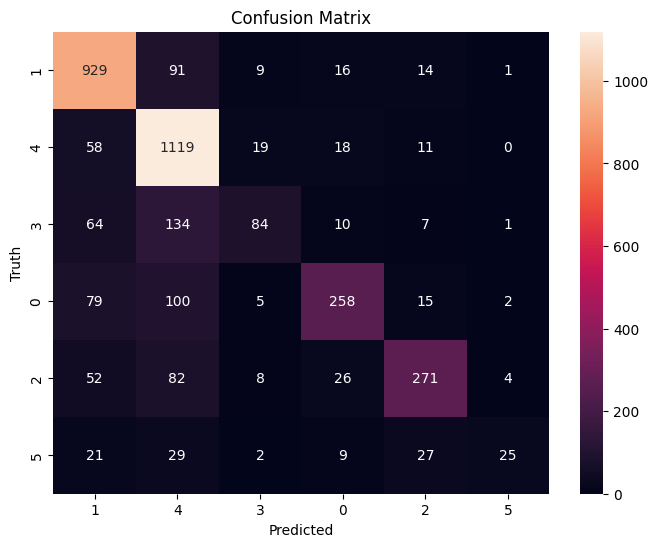

In [34]:
cm_LSTM = confusion_matrix(data_validation['label'], val_predictions)
labels = y_test.unique()

plt.figure(figsize=(8,6))
sns.heatmap(cm_maxent, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

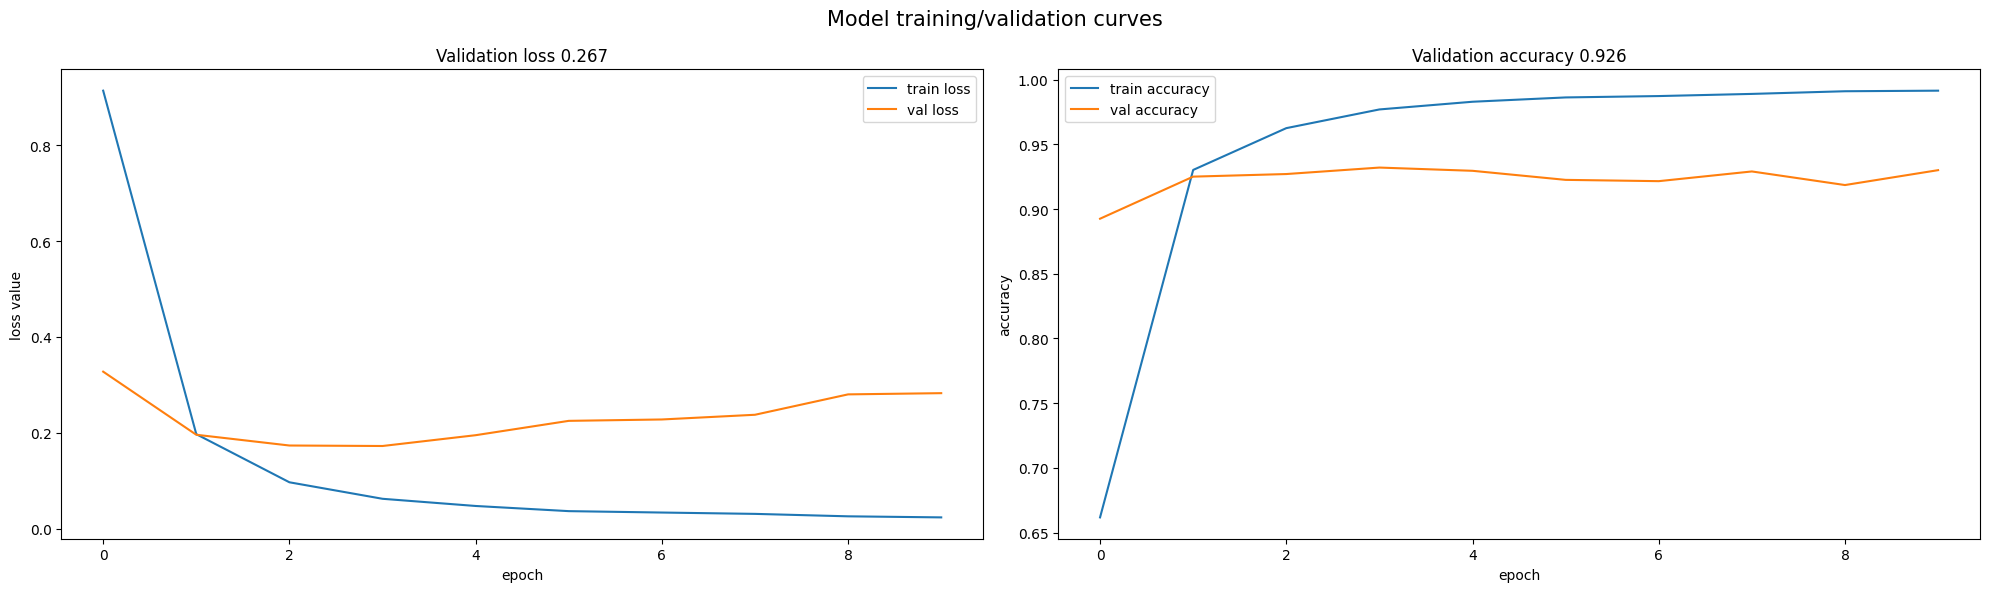

In [35]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f}".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["accuracy"], label="train accuracy")
ax2.plot(history.history["val_accuracy"], label="val accuracy")
ax2.set_title(
    "Validation accuracy {:.3f}".format(
        np.mean(history.history["val_accuracy"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()


#So sánh ba mô hình

In [36]:
# Tạo một dictionary lưu trữ độ chính xác của từng mô hình
accuracy_dict = {
    'Decision Tree': accuracy_Ada,
    'MaxEnt': accuracy_maxent,
    'Deep Learning LSTM': val_accuracy
}

# Chọn ra mô hình có độ chính xác cao nhất
best_model = max(accuracy_dict, key=accuracy_dict.get)

# In ra mô hình có độ chính xác cao nhất và giá trị độ chính xác tương ứng
print("Best Model:", best_model)
print("Accuracy:", accuracy_dict[best_model])


Best Model: Deep Learning LSTM
Accuracy: 0.9300000071525574


#Nhập số dòng trong data test:

In [37]:
# Khởi tạo LabelEncoding và gắn nó với emotion_labels
label_encoder = LabelEncoder()
emotion_labels = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
label_encoder.fit(list(emotion_labels.keys()))

# Tạo cột 'predict' mới trong DataFrame data_validation
data_validation['predict'] = np.nan

# Lặp qua tất cả các hàng trong data_validation
for index, row in data_validation.iterrows():
    input_text = row['text']

    # Xử lý trước văn bản đầu vào
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen = max_sequence_length)

    # Đưa ra dự đoán
    prediction = model.predict(padded_input_sequence)

    # Chuyển đổi ngược the predicted label
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])

    # # Cập nhật cột “predict” với predicted label
    data_validation.at[index, 'predict'] = predicted_label[0]

data_validation['predict'] = data_validation['predict'].astype(int)

1/1 [==============================] - 0s 19ms/step


In [38]:
data_validation

,text,label,predict
0,im feeling quite sad and sorry for myself but ...,0,0
1,i feel like i am still looking at a blank canv...,0,0
2,i feel like a faithful servant,2,2
3,i am just feeling cranky and blue,3,3
4,i can have for a treat or if i am feeling festive,1,1
...,...,...,...
1995,im having ssa examination tomorrow in the morn...,0,0
1996,i constantly worry about their fight against n...,1,1
1997,i feel its important to share this info for th...,1,1
1998,i truly feel that if you are passionate enough...,1,1


#Nhập câu:

In [39]:

# Input_text from user
input_text = input("Please input sentence here: ")

# Preprocess the input text
input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length)

# Make the prediction
prediction = model.predict(padded_input_sequence)


# Inverse transform the predicted label
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
emotion_labels = emotion_labels[label_encoder.inverse_transform([np.argmax(prediction[0])])[0]]


print(f"Predicted Emotion: {predicted_label}: {emotion_labels}")


Please input sentence here: i know what it feels like he stressed glaring down at her as she squeezed more soap onto her sponge
1/1 [==============================] - 0s 19ms/step
Predicted Emotion: [3]: anger
